# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

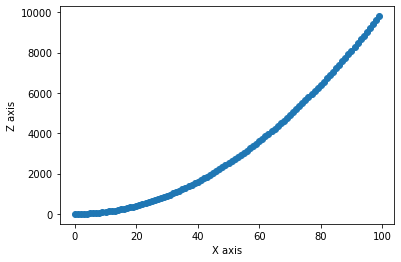

In [4]:
plt.xlabel('X axis')
plt.ylabel('Z axis')
plt.scatter(x,z)

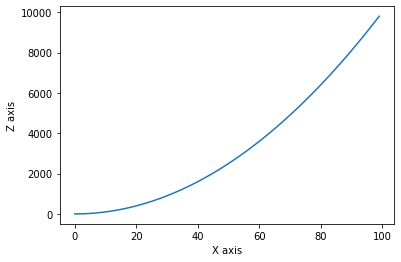

In [5]:
plt.xlabel('X axis')
plt.ylabel('Z axis')
plt.plot(x,z)
plt.show()

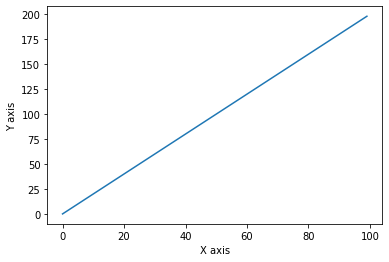

In [6]:
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.plot(x,y)
plt.show()

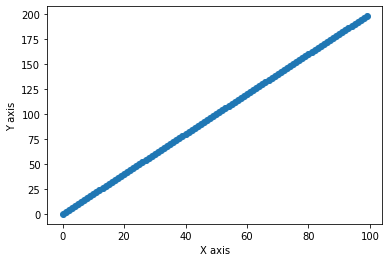

In [7]:
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.scatter(x,y)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

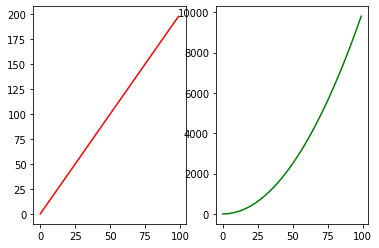

In [8]:
# Method 2
fig,(ax1, ax2) =plt.subplots(nrows=1, ncols=2)
ax1.plot(x,y,'r')
ax2.plot(x,z,'g')
plt.show() #displays the subplots


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

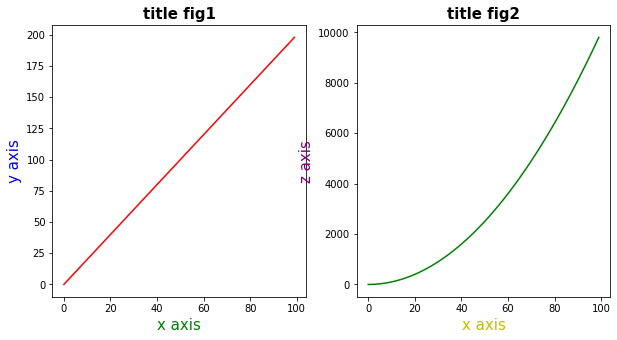

In [9]:
# your code here
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) #figsize width and lenght
ax1.plot(x,y,'r')
ax1.set_title('title fig1',fontweight="bold", size=15) #sets the title of the fig 1 and the font and size
ax1.set_xlabel('x axis', size= 15) # sets the name of the x axis and the size
ax1.xaxis.label.set_color('g') #change the color of the x axis to green
ax1.set_ylabel('y axis', size =15)  # sets the name of the y axis and the size
ax1.yaxis.label.set_color('b') #change the color of the x axis to blue

ax2.plot(x,z,'g')
ax2.set_title('title fig2',fontweight='bold',size=15)
ax2.set_xlabel('x axis',size =15)
ax2.xaxis.label.set_color('y') #change the color of the x axis to yellow
ax2.set_ylabel('z axis', size=15)
ax2.yaxis.label.set_color('purple')


plt.show() #displays the subplots

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

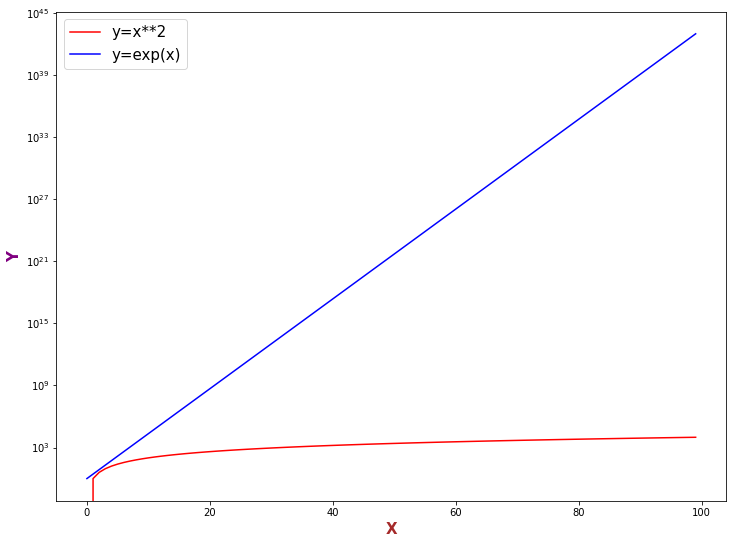

In [10]:
y1 = x **2
y2 = np.exp(x)

fig ,ax = plt.subplots(figsize=(12,9))
ax.plot(x,y1,'r',label='y=x**2')
ax.plot(x,y2,'b',label='y=exp(x)')

ax.set_yscale('log') #sets the yaxis to the logarithmic scale
ax.set_xscale('linear')#sets the xaxis to the linear(normal) scale

ax.set_ylabel('Y',fontweight='bold',size=15,color ='purple')
ax.set_xlabel('X',fontweight='bold',size=15,color='brown')
ax.legend(fontsize=15) #create a legend and changes the size of the legend

#### As a bonus challenge, try to add a legend to the plot.

In [11]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [136]:
import pandas as pd
# your code here
fitbit_df =pd.read_csv('C:\\Users\\guilh\\lab-matplotlib-seaborn\\your-code\\fitbit2.csv')
fitbit_df

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

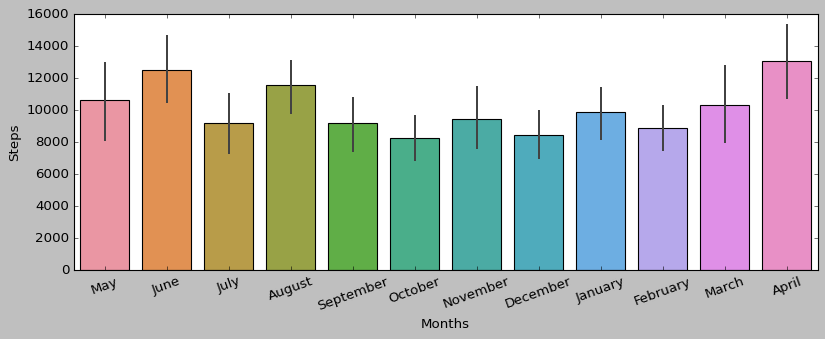

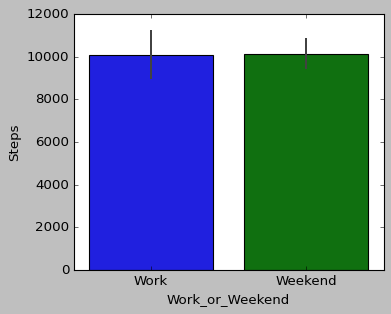

In [186]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_per_month = fitbit_df.groupby('Months').agg({'Steps':'mean'}).reset_index()

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

steps_per_month['Months'] = pd.Categorical(steps_per_month['Months'], categories=months, ordered=True)
steps_per_month = steps_per_month.sort_values('Months')

plt.figure(figsize = (12,4))

sns.barplot(x='Months', y='Steps', data=fitbit_df)


plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)
plt.savefig('figures/steps_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

med_steps_work_or_weekend = fitbit_df.groupby('Work_or_Weekend').agg({'Steps':'median'}).reset_index()

plt.figure(figsize = (5,4))

sns.barplot(x='Work_or_Weekend', y='Steps', data=fitbit_df)

plt.xticks([0,1],my_xticks)
plt.savefig('figures/steps_by_week.png', dpi=300, bbox_inches='tight')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

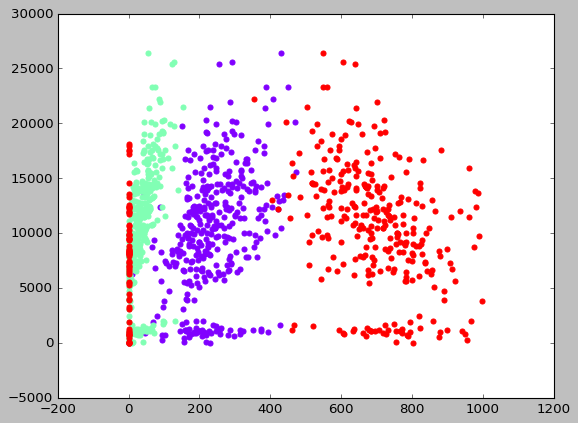

In [25]:
import matplotlib.cm as cm

x = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
colors = cm.rainbow(np.linspace(0, 1, len(x)))
for col, c in zip(x, colors):
    plt.scatter(x = fitbit_df[col], y = fitbit_df['Steps'], color=c)

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [62]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [63]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [64]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int64','float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [65]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [66]:
# your code here
import matplotlib.style
import matplotlib as mpl
#sets the style to classic
mpl.style.use('classic') # changes the style of the plot, we can try to use the style 'fivethirtyeight' .

#### Use the right visulalization to show the distribution of column `Age`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


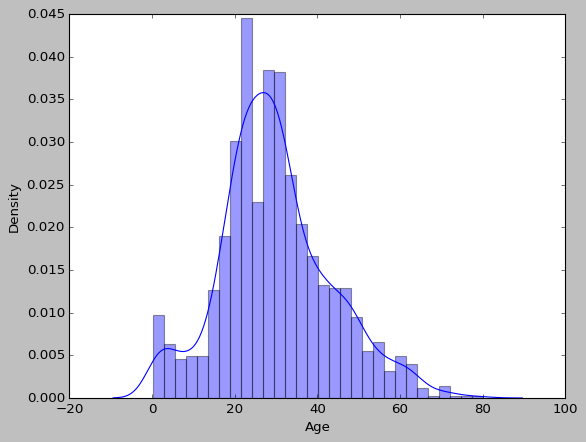

In [67]:
# your code here
sns.distplot(titanic['Age']) # plot a univariate distribution of observations

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

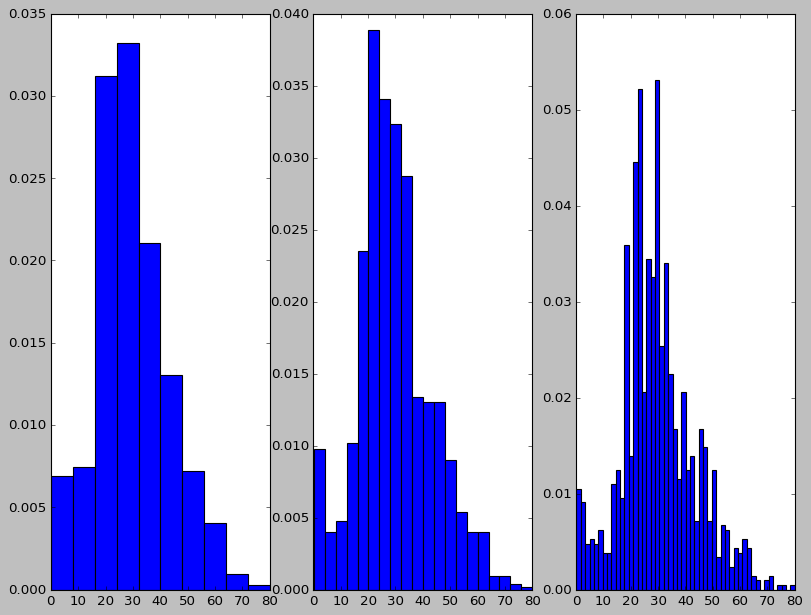

In [68]:
# your code here
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=((12,9)))
ax1.hist(titanic['Age'],bins=10, density=True, histtype='bar', stacked=True)
ax2.hist(titanic['Age'],bins=20, density=True, histtype='bar', stacked=True)
ax3.hist(titanic['Age'],bins=50, density=True, histtype='bar', stacked=True)

plt.show()

#### How does the bin size affect your plot?

In [69]:
"""
your comments here

with the increase of the number of bins the plot gets smaller, more consensed
"""

'\nyour comments here\n\nwith the increase of the number of bins the plot gets smaller, more consensed\n'

#### Use seaborn to show the distribution of column `Age`.

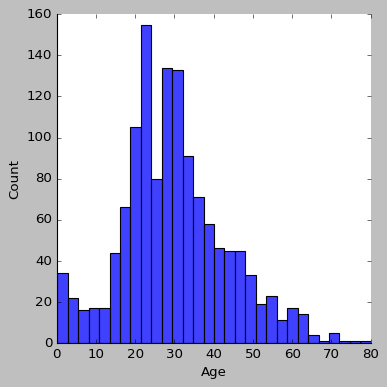

In [70]:
# your code here
sns.displot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

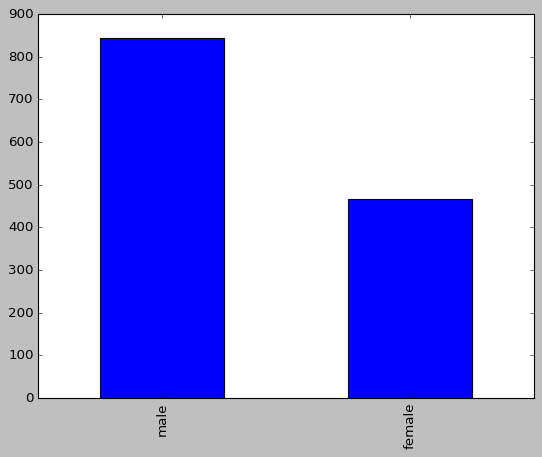

In [71]:
# Method 1 - matplotlib
# your code here
titanic['Gender'].value_counts().plot.bar()

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

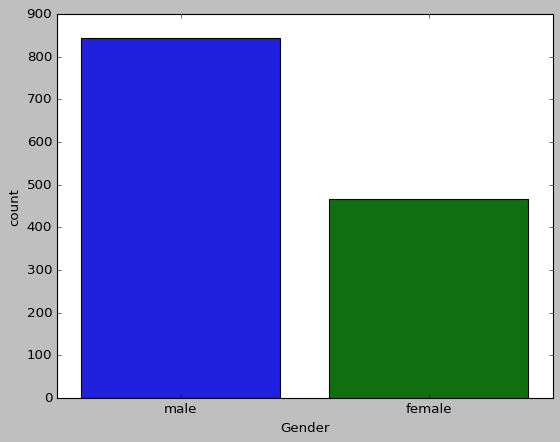

In [72]:
# Method 2 - seaborn
# your code here
sns.countplot(x="Gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

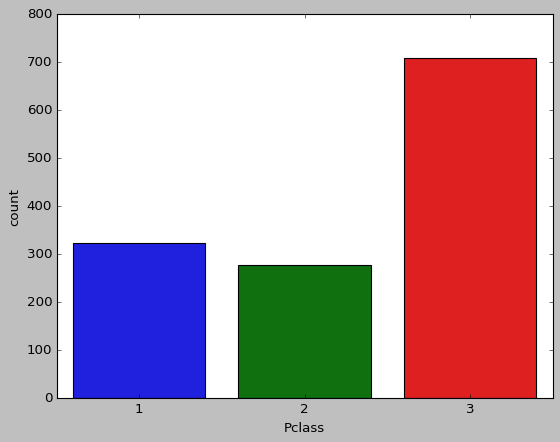

In [73]:
# your code here
sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

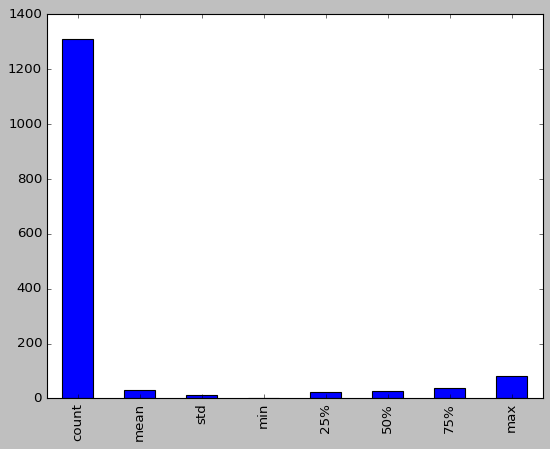

In [109]:
# your code here
titanic['Age'].describe().plot.bar()

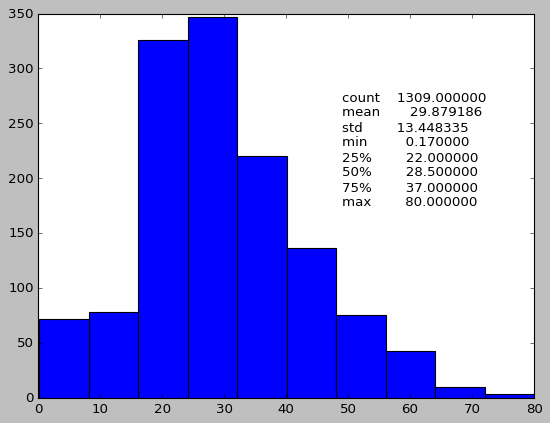

In [134]:
df = pd.DataFrame(np.random.normal(size=(2000,)))
fig, ax = plt.subplots()
ax.hist(titanic['Age'])
plt.figtext(0.6,0.5, titanic['Age'].describe().to_string())
plt.show()

#### What does the  plot tell you about the feature `Age`?

In [76]:
"""
your comments here
In average the passangers have a age arround 30 years old
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

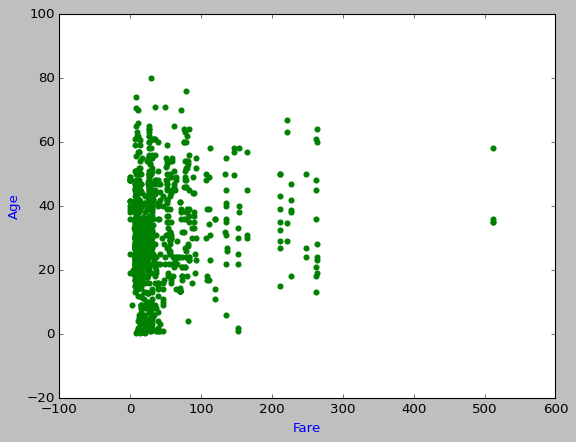

In [161]:
# Method 1 - matplotlib
# your code here
plt.scatter(x= titanic['Fare'], y=titanic['Age'],color='green')
plt.xlabel('Fare',color='blue')
plt.ylabel('Age',color='blue')

plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

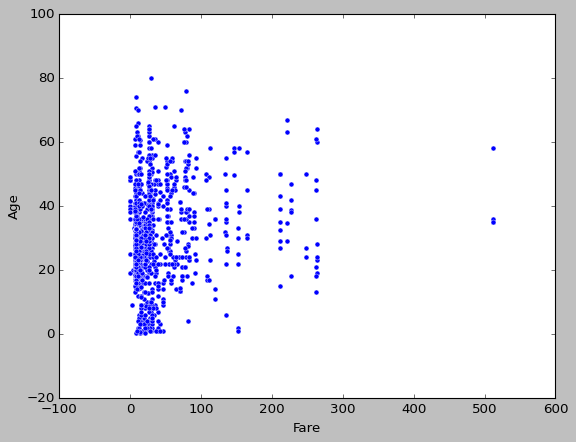

In [164]:
# Method 2 - seaborn
# your code here

sns.scatterplot(data=titanic, x="Fare", y='Age')

#### Plot the correlation matrix using seaborn.

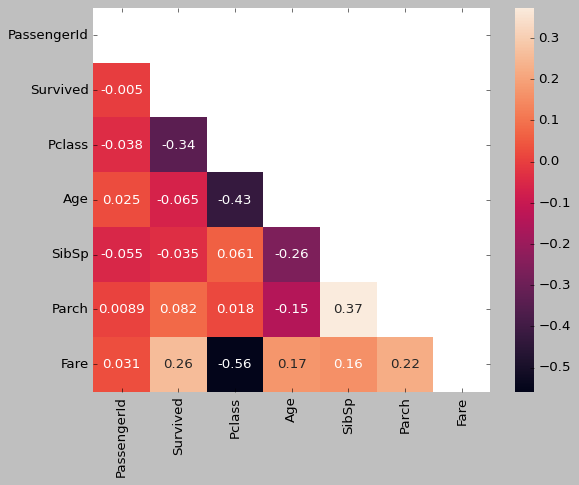

In [121]:

matrix = np.triu(titanic.corr())
sns.heatmap(titanic.corr(), annot=True, mask=matrix)

plt.show()

#### What are the most correlated features?

In [82]:
"""
your comments here
SibSp and Parch are the msot correlated features
"""

'\nyour comments here\nSibSp and Parch are the msot correlated features\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

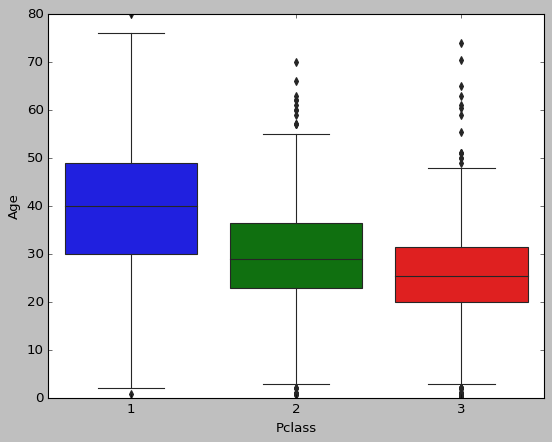

In [150]:
# your code here


sns.boxplot(x= 'Pclass', y= 'Age', data=titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

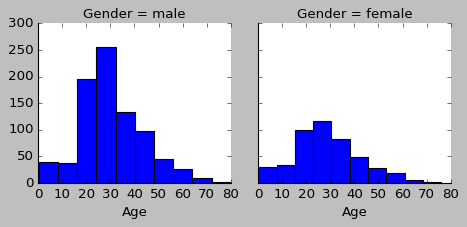

In [119]:
# your code here
g = sns.FacetGrid(titanic, col="Gender") #Multi-plot grid for plotting conditional relationships
g.map_dataframe(plt.hist,"Age")
plt.show()



# The Zen of Python - curiosity!!!

In [13]:

s = """Gur Mra bs Clguba, ol Gvz Crgref
Ornhgvshy vf orggre guna htyl.
Rkcyvpvg vf orggre guna vzcyvpvg.
Fvzcyr vf orggre guna pbzcyrk.
Pbzcyrk vf orggre guna pbzcyvpngrq.
Syng vf orggre guna arfgrq.
Fcnefr vf orggre guna qrafr.
Ernqnovyvgl pbhagf.
Fcrpvny pnfrf nera'g fcrpvny rabhtu gb oernx gur ehyrf.
Nygubhtu cenpgvpnyvgl orngf chevgl.
Reebef fubhyq arire cnff fvyragyl.
Hayrff rkcyvpvgyl fvyraprq.
Va gur snpr bs nzovthvgl, ershfr gur grzcgngvba gb thrff.
Gurer fubhyq or bar-- naq cersrenoyl bayl bar --boivbhf jnl gb qb vg.
Nygubhtu gung jnl znl abg or boivbhf ng svefg hayrff lbh'er Qhgpu.
Abj vf orggre guna arire.
Nygubhtu arire vf bsgra orggre guna *evtug* abj.
Vs gur vzcyrzragngvba vf uneq gb rkcynva, vg'f n onq vqrn.
Vs gur vzcyrzragngvba vf rnfl gb rkcynva, vg znl or n tbbq vqrn.
Anzrfcnprf ner bar ubaxvat terng vqrn -- yrg'f qb zber bs gubfr!"""

d = {}
for c in (65, 97):
    for i in range(26):
        d[chr(i+c)] = chr((i+13) % 26 + c)

print("".join([d.get(c, c) for c in s]))

The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
